# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [16]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'C:\\Users\SamuelWork\Downloads\data'

In [17]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [19]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
app_type = app_train.dtypes
app_type_res = app_type != 'object'
app_type_res = np.array(app_type_res)
type_arr = []
for i in range(len(app_type_res)):
    if app_type_res[i] == True:
        type_arr.append(i)
print(type_arr)

[0, 1, 6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]


In [21]:
X = app_train.values
X

array([[100002, 1, 'Cash loans', ..., 0.0, 0.0, 1.0],
       [100003, 0, 'Cash loans', ..., 0.0, 0.0, 0.0],
       [100004, 0, 'Revolving loans', ..., 0.0, 0.0, 0.0],
       ...,
       [456253, 0, 'Cash loans', ..., 1.0, 0.0, 1.0],
       [456254, 1, 'Cash loans', ..., 0.0, 0.0, 0.0],
       [456255, 0, 'Cash loans', ..., 2.0, 0.0, 1.0]], dtype=object)

In [22]:
app_train_columns = app_train.columns

In [23]:
#eliminate nan
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='mean')
X[:, type_arr] = imp.fit_transform(X[:, type_arr])
X

array([[100002.0, 1.0, 'Cash loans', ..., 0.0, 0.0, 1.0],
       [100003.0, 0.0, 'Cash loans', ..., 0.0, 0.0, 0.0],
       [100004.0, 0.0, 'Revolving loans', ..., 0.0, 0.0, 0.0],
       ...,
       [456253.0, 0.0, 'Cash loans', ..., 1.0, 0.0, 1.0],
       [456254.0, 1.0, 'Cash loans', ..., 0.0, 0.0, 0.0],
       [456255.0, 0.0, 'Cash loans', ..., 2.0, 0.0, 1.0]], dtype=object)

In [25]:
#Calculate the mean and std of AMT_INCOME_TOTAL
X = pd.DataFrame(X)
X.columns = app_train_columns
X['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [26]:
X['AMT_INCOME_TOTAL'].std()

237123.14627885626

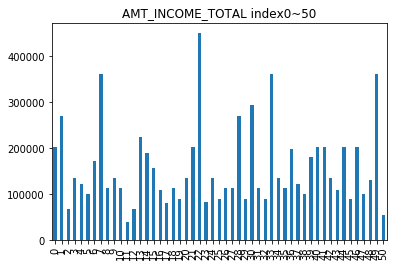

In [70]:
p = X.loc[0:50, 'AMT_INCOME_TOTAL']
plt = p.plot(kind='bar', title = 'AMT_INCOME_TOTAL index0~50')
